Data Preparation:

Obtain a dataset containing credit-related features and labels (e.g., whether a credit applicant is high risk or low risk).

Homomorphic Encryption:
Choose a suitable homomorphic encryption library. PySEAL is a popular choice for implementing homomorphic encryption in Python.

Autoencoder Design:
Design an autoencoder architecture for feature extraction. The autoencoder should take in encrypted credit-related features and produce an encoded representation.
You may need to design the autoencoder layers based on the specific features in your dataset.

Training:
Train the homomorphic autoencoder using encrypted credit data.
Ensure that the training process is privacy-preserving and that the model doesn't learn any sensitive information.

Credit Risk Identification:
Use the encoded representation of the data from the autoencoder to perform credit risk identification or classification.
This step typically involves training a classifier (e.g., logistic regression, neural network) on the encoded data to predict credit risk.

Decryption:
If necessary, you can decrypt the final classification results to obtain the credit risk labels while maintaining privacy.

Evaluation:
Evaluate the performance of your credit risk identification system using appropriate metrics (e.g., accuracy, precision, recall).

Privacy and Security Considerations:

Ensure that your homomorphic encryption setup is secure and follows best practices for preserving privacy.
Address any legal and compliance requirements related to handling sensitive financial data.

## Attribute Information
   * Attribute 1:  (qualitative) __Status of existing checking account__                           
      A11 :      ... <    0 DM                           
      A12 : 0 <= ... <  200 DM                                   
      A13 :      ... >= 200 DM / salary assignments for at least 1 year                           
      A14 : no checking account    
      
   * Attribute 2:  (numerical) __Duration in month__

   * Attribute 3:  (qualitative) __Credit history__               
      A30 : no credits taken/all credits paid back duly                   
      A31 : all credits at this bank paid back duly                       
      A32 : existing credits paid back duly till now                       
      A33 : delay in paying off in the past                           
      A34 : critical account/other credits existing (not at this bank)          
      
   * Attribute 4:  (qualitative)    __Purpose__              
      A40 : car (new)                         
      A41 : car (used)                              
      A42 : furniture/equipment                              
      A43 : radio/television                 
      A44 : domestic appliances                     
      A45 : repairs                        
      A46 : education                      
      A47 : vacation                    
      A48 : retraining                     
      A49 : business                         
      A410 : others
   * Attribute 5:  (numerical) __Credit amount__   
   * Attibute 6:  (qualitative) __Savings account/bonds__           
      A61 :          ... <  100 DM            
      A62 :   100 <= ... <  500 DM           
      A63 :   500 <= ... < 1000 DM            
      A64 :          .. >= 1000 DM                   
      A65 :   unknown/ no savings account         
      
   * Attribute 7:  (qualitative) __Present employment since__      
        A71 : unemployed                       
        A72 :       ... < 1 year           
        A73 : 1  <= ... < 4 years         
        A74 : 4  <= ... < 7 years            
        A75 :       .. >= 7 years         
   * Attribute 8:  (numerical) __Installment rate in percentage of disposable income__ 
   * Attribute 9:  (qualitative) __Personal status and sex__                      
        A91 : male   : divorced/separated               
        A92 : female : divorced/separated/married              
        A93 : male   : single               
        A94 : male   : married/widowed              
        A95 : female : single      
   * Attribute 10: (qualitative) __Other debtors / guarantors__                   
        A101 : none                  
        A102 : co-applicant                   
        A103 : guarantor             
        
   * Attribute 11: (numerical) __Present residence since__   

   * Attribute 12: (qualitative) __Property__
        A121 : real estate                        
        A122 : if not A121 : building society savings agreement/life insurance                           
        A123 : if not A121/A122 : car or other, not in attribute 6           
        A124 : unknown / no property    
     
   * Attribute 13: (numerical) __Age in years__
   * Attribute 14: (qualitative) __Other installment plans__    
        A141 : bank   
        A142 : stores    
        A143 : none  
   * Attribute 15: (qualitative) __Housing__           
        A151 : rent       
        A152 : own          
        A153 : for free      
   * Attribute 16: (numerical) __Number of existing credits at this bank__
   * Attribute 17: (qualitative) __Job__         
        A171 : unemployed/ unskilled  - non-resident           
        A172 : unskilled - resident                  
        A173 : skilled employee / official                                
        A174 : management/ self-employed/highly qualified employee/ officer 
        
       
   
  * Attribute 18: (numerical) __Number of people being liable to provide maintenance for__ 
  * Attribute 19: (qualitative) __Telephone__             
    A191 : none              
    A192 : yes, registered under the customers name                     
  * Attribute 20: (qualitative) __foreign worker__              
    A201 : yes         
    A202 : no   


### Target Variable                                        
* __Cost Matrix__  
    * 1 = __Good Risk__
    * 2 = __Bad Risk__


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout, Flatten, Activation 
from keras.optimizers.legacy import Adam
from keras.layers import Input
from keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.preprocessing import KBinsDiscretizer

# Create a label encoder
lb_encoder = LabelEncoder()

# Load the German credit card data
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv('german.data', names = names, delimiter=' ')
data_original = data.copy()

In [2]:
import json

#converting entire dataset into json string for testing the API

only_data = data.drop('classification', axis=1)
rowwise_data = only_data.to_dict(orient='records')

# Convert list of dictionaries to JSON string
json_string = json.dumps(rowwise_data)


### Import and preprocess data. Conduct exploratory data analysis and understand the data structure.

In [3]:
data_original = data.copy()

In [4]:
data_original

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [5]:

est = KBinsDiscretizer(n_bins=4, encode='ordinal', 
                       strategy='uniform')

num_col = ["duration","creditamount", "installmentrate", "residencesince", "age","existingcredits","peopleliable"]
for col in num_col:    
    data[col] = est.fit_transform(data[[col]])

for item in data.columns:
    if item not in num_col:        
        data[item] = lb_encoder.fit_transform(data[item])           

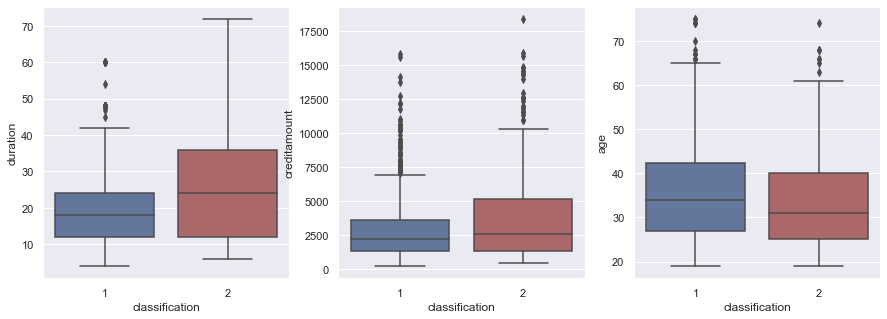

In [6]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=data_original["duration"],x=data_original["classification"],orient='v' , ax=axes[0],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=data_original["creditamount"],x=data_original["classification"], orient='v' , ax=axes[1],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=data_original["age"],x=data_original["classification"], orient='v' , ax=axes[2],palette=["#5975A4","#B55D60"]) #box plot
plt.show()

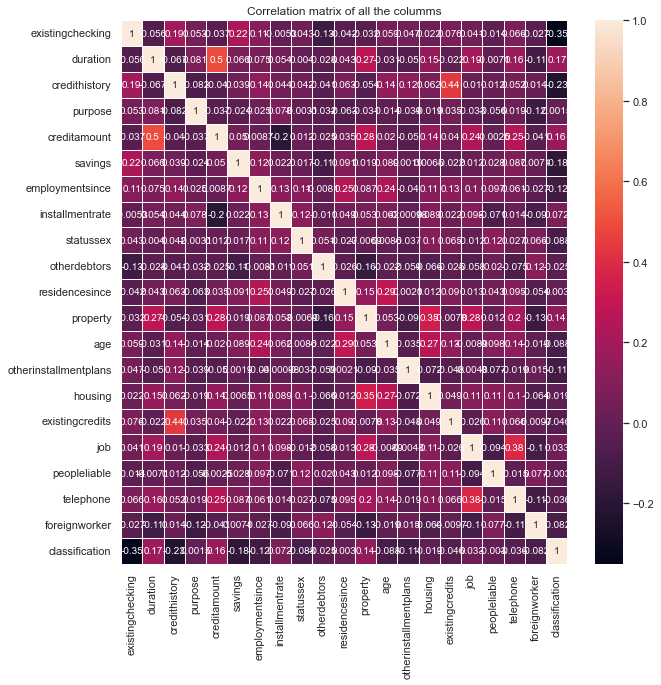

In [7]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, annot=True, linewidth=0.5, xticklabels=data.columns)
ax.set_yticklabels(labels=data.columns, rotation=0)
ax.set_title("Correlation matrix of all the columms")
plt.show()

# Simple Encoder without Encryption

In [8]:
enc

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,0,0.0,4,4,0.0,4,4,3.0,2,0,...,0,3.0,2,1,1.0,2,0.0,1,0,0
1,1,2.0,2,4,1.0,0,2,1.0,1,0,...,0,0.0,2,1,0.0,2,0.0,0,0,1
2,3,0.0,4,7,0.0,0,3,1.0,2,0,...,0,2.0,2,1,0.0,1,3.0,0,0,0
3,0,2.0,2,3,1.0,0,3,1.0,2,2,...,1,1.0,2,2,0.0,2,3.0,0,0,0
4,0,1.0,3,0,1.0,0,2,2.0,2,0,...,3,2.0,2,2,1.0,2,3.0,0,0,1


In [9]:

X = data[['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']]
Y = data["classification"]

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Create the encoder
encoder = Sequential()
encoder.add(Dense(128, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(8, activation="relu"))
encoder.add(Dense(1, activation="sigmoid"))

# Compile the encoder
encoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the encoder
encoder.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 982us/step - loss: 0.5862
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5269
Epoch 3/100
25/25 [==============================] - 0s 826us/step - loss: 0.4991
Epoch 4/100
25/25 [==============================] - 0s 767us/step - loss: 0.4861
Epoch 5/100
25/25 [==============================] - 0s 772us/step - loss: 0.4794
Epoch 6/100
25/25 [==============================] - 0s 785us/step - loss: 0.4551
Epoch 7/100
25/25 [==============================] - 0s 791us/step - loss: 0.4493
Epoch 8/100
25/25 [==============================] - 0s 776us/step - loss: 0.4582
Epoch 9/100
25/25 [==============================] - 0s 777us/step - loss: 0.4272
Epoch 10/100
25/25 [==============================] - 0s 755us/step - loss: 0.4031
Epoch 11/100
25/25 [==============================] - 0s 789us/step - loss: 0.3931
Epoch 12/100
25/25 [==============================] - 0s 879us/step - loss: 0.3839
Epoch 13/100
25

In [11]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 128)                 2688      
                                                                 
 dense_1 (Dense)             (32, 64)                  8256      
                                                                 
 dense_2 (Dense)             (32, 32)                  2080      
                                                                 
 dense_3 (Dense)             (32, 16)                  528       
                                                                 
 dense_4 (Dense)             (32, 8)                   136       
                                                                 
 dense_5 (Dense)             (32, 1)                   9         
                                                                 
Total params: 13697 (53.50 KB)
Trainable params: 13697 (

In [12]:
# Calculate the accuracy of the encoder on the test data
y_pred = (encoder.predict_on_batch(X_test) >= 0.5).astype(int)
y_pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

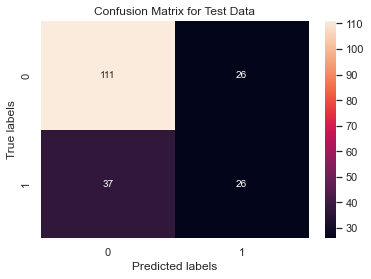

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as pt
import seaborn as sbn

con_mat = confusion_matrix(y_test, y_pred)
ax= pt.subplot()
sbn.heatmap(con_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Data')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       137
           1       0.50      0.41      0.45        63

    accuracy                           0.69       200
   macro avg       0.62      0.61      0.62       200
weighted avg       0.67      0.69      0.68       200



### Research and understand privacy-preserving machine learning techniques, such as differential privacy and homomorphic encryption.

### Encryption

In [15]:
import torch, os
import tenseal as ts
import torch.nn as nn
import torch.optim as optim

In [16]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from base64 import urlsafe_b64encode, urlsafe_b64decode

def encrypt_deterministic(key, plaintext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()
    data_to_encrypt = str(plaintext).encode()
    padded_plaintext = data_to_encrypt.ljust(16) # Pad to block size (16 bytes for AES)
    ciphertext = encryptor.update(padded_plaintext) + encryptor.finalize()
    return urlsafe_b64encode(ciphertext)

def decrypt_deterministic(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted = decryptor.update(urlsafe_b64decode(ciphertext)) + decryptor.finalize()
    return decrypted.rstrip(b'\0') # Remove padding

# Generate a proper AES key using PBKDF2
#Salt and password needs to be kept save
password = b'password'
salt = b'\xeb\xd0\xd7W\xe8\x15w7\xcf0\x1f]\xe2x\xcd\xc8'

kdf = PBKDF2HMAC(
algorithm=hashes.SHA256(),
iterations=100000,
salt=salt,
    length=32, # Key size for AES-256
    backend=default_backend()
    )
key = kdf.derive(password)

In [17]:
#batch the data
batch_size = 50
num_batches = len(data) // batch_size

In [18]:
X = data[['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']]
Y = data["classification"]

encrypted_df = X.apply(lambda x: x.apply(lambda y: encrypt_deterministic(key, y)))
X_hot = pd.get_dummies(encrypted_df, columns=encrypted_df.columns)
encrypted_df_hot = X_hot.copy()
encrypted_df_hot["classification"] = Y
       
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hot,Y, test_size=0.2)

In [20]:
print('Printing sample data point for SAVINGS column after encryption:', encrypted_df.iloc[0,5])


Printing sample data point for SAVINGS column after encryption: b'FftjMn7cmspT3KJSXxaxCg=='


In [21]:
print('Decrypting saving column for the same data point :',float(decrypt_deterministic(key, encrypted_df.iloc[0,5])))

Decrypting saving column for the same data point : 4.0


In [22]:
#batch the data
batch_size = 50
num_batches = len(encrypted_df_hot) / batch_size
encrypted_batches = [encrypted_df_hot[i:i + batch_size] for i in range(0,len(encrypted_df_hot), batch_size)]
tot_columns = encrypted_df_hot.shape[1]
print(tot_columns)

81


In [23]:
print('Shape of Original Dataframe:' , data_original.shape)
print('Shape of Encrypted Dataframe with Feature Columns:' , encrypted_df.shape)
print('Shape of Encrypted One Hot Encoded Dataframe along with target attribute' , encrypted_df_hot.shape)

Shape of Original Dataframe: (1000, 21)
Shape of Encrypted Dataframe with Feature Columns: (1000, 20)
Shape of Encrypted One Hot Encoded Dataframe along with target attribute (1000, 81)


In [25]:
tot_columns

81

### Design a machine learning model for credit risk assessment while incorporating privacy-preserving techniques.

In [26]:
#Define Generator
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=128, input_dim=encrypted_df_hot.shape[1]))
    #generator.add(LeakyReLU(0.1))
    
    generator.add(Dense(units=256))
    
    #generator.add(Dense(units=256))
    #generator.add(LeakyReLU(0.1))
    
    generator.add(Dense(units=512))
    #generator.add(LeakyReLU(0.1))    
    
    generator.add(Dense(units=1024))
    #generator.add(LeakyReLU(0.1))
        
    
    #generator.add(Flatten())
    
    generator.add(Dense(units=encrypted_df_hot.shape[1], activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0000001, beta_1=0.3, beta_2=0.5))
    return generator

#Define discriminator
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=128, input_dim=encrypted_df_hot.shape[1]))
    #discriminator.add(LeakyReLU(0.2))
    #discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=256))
    #discriminator.add(Dense(units=256))
    # discriminator.add(LeakyReLU(0.2))
    # discriminator.add(Dropout(0.3))
    discriminator.add(Dense(units=512))
        
    discriminator.add(Dense(units=1024, activation='relu'))
    # discriminator.add(LeakyReLU(0.2))   
    # discriminator.add(Dense(1024, activation='relu'))
    
    discriminator.add(Dense(units=encrypted_df_hot.shape[1], activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0000001, beta_1=0.3, beta_2=0.5))
    return discriminator

# create GAN
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(encrypted_df_hot.shape[1],))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss= 'binary_crossentropy', optimizer='adam', metrics='accuracy')
    gan.summary()
    return gan

#define GAN model
def train_gan(gan, generator, discriminator, epochs=1, batch_size=50):
    
    for e in range(epochs):
        print("In epoch :::::::::::::::::::::::::::::::::::::::::::::::::: ", e)        
        for batch in encrypted_batches:            
            # print("In batch no :::::::::::::::::::::::::::::::::::::::::::::::::: ", i)
            noise = np.random.normal(0,1,[batch_size,tot_columns])
            generated_data = generator.predict(noise)
            
            real_data = batch
            #real_data = np.stack(real_data, axis=0)
            discriminator.trainable = True
            real_loss= discriminator.train_on_batch(real_data,np.ones((batch_size,tot_columns)))#Compute the discriminator's loss on real data
            fake_loss= discriminator.train_on_batch(generated_data,np.zeros((batch_size,tot_columns))) #Compute the discriminator's loss on fake data           
            discriminator.trainable = False #Don't change discriminator weights
            loss, accuracy = gan.train_on_batch(noise, np.ones((batch_size,tot_columns)))
            #loss, accuracy = gan.train_on_batch(X_test, y_test)
            print('loss: ', loss)        
            if loss < .4:
                break
        if loss < .4:
            break
        

### Implement and train the model using the dataset. Validate the model using appropriate performance metrics.

In [27]:
#create the models
generator = create_generator()
discriminator = create_discriminator()
#train GAN model
gan = create_gan(discriminator,generator)
train_gan(gan,generator, discriminator)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 81)]              0         
                                                                 
 sequential_1 (Sequential)   (None, 81)                783441    
                                                                 
 sequential_2 (Sequential)   (None, 81)                783441    
                                                                 
Total params: 1566882 (5.98 MB)
Trainable params: 783441 (2.99 MB)
Non-trainable params: 783441 (2.99 MB)
_________________________________________________________________
In epoch ::::::::::::::::::::::::::::::::::::::::::::::::::  0
2/2 [==============================] - 0s 2ms/step
loss:  0.6875962615013123
2/2 [==============================] - 0s 1ms/step
loss:  0.6740193367004395
2/2 [==============================] - 0s 2ms/step
loss:  0.66811770

### Save the model

In [28]:
gan.save('gan.h5')

C:\Users\chanc\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Set up a server

In [29]:
from flask import Flask
app = Flask(__name__)

### Load the model

In [30]:
from keras.models import load_model
gan = load_model('gan.h5')

In [31]:
noise = np.random.normal(0,1,[1000,encrypted_df_hot.shape[1]])
synthetic_data = generator.predict(noise)
#generated_labels = discriminator.predict(noise)

32/32 [==============================] - 0s 2ms/step


In [32]:
synthetic_data_df = pd.DataFrame(synthetic_data, columns=encrypted_df_hot.columns)
# Calculate the mean for each column
column_means = synthetic_data_df.mean()

# Create a new DataFrame filled with 0s
binary_gan_values_df = pd.DataFrame(0, index=synthetic_data_df.index, columns=synthetic_data_df.columns)

# Use conditional statements to set values to 1 based on the mean
for column in synthetic_data_df.columns:
    binary_gan_values_df[column] = synthetic_data_df[column].apply(lambda x: 1 if x >= column_means[column] else 0)

In [34]:
binary_synthetic_labels = binary_gan_values_df['classification']
binary_synthetic_data = binary_gan_values_df.drop('classification', axis=1)

In [35]:
len(encrypted_batches[0].columns)

81

### Create an API endpoint

### Send requests to API--> http://localhost:8049/predict

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class BinaryClassifier(nn.Module):
    def __init__(self, in_columns):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(in_columns, 256, bias=True)
        self.layer2 = nn.Sequential(nn.Linear(256, 1024, bias=True), nn.Dropout(0.1))
        self.layer3 = nn.Sequential(nn.Linear(1024, 512, bias=True), nn.Dropout(0.1))
        self.layer4 = nn.Sequential(nn.Linear(512, 256, bias=True), nn.Dropout(0.1))
        self.layer5 = nn.Linear(256, 1, bias=True)
        

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.sigmoid(self.layer5(x))        
        return x

# Create an instance of the model
model = BinaryClassifier(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Training loop
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    
    y_pred = model(torch.tensor(X_train.values, dtype=torch.float32))
    
    # Modify the target tensor
    y_train_tn = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    # Calculate the loss
    loss = criterion(y_pred, y_train_tn)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')



Epoch [100/1000], Loss: 0.6049954891204834
Epoch [200/1000], Loss: 0.5978745818138123
Epoch [300/1000], Loss: 0.5795631408691406
Epoch [400/1000], Loss: 0.5258166193962097
Epoch [500/1000], Loss: 0.476771742105484
Epoch [600/1000], Loss: 0.4445854127407074
Epoch [700/1000], Loss: 0.41492199897766113
Epoch [800/1000], Loss: 0.3775435984134674
Epoch [900/1000], Loss: 0.3777758479118347
Epoch [1000/1000], Loss: 0.3376879394054413


In [37]:
with torch.no_grad():
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32))
    #y_pred_binary = (y_pred >= 0.6).int()  # Using 0.5 as threshold here for binary classification
    y_pred_binary = np.where(y_pred >= y_pred.mean(), 1, 0)

print(y_pred_binary[10:20])

[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]


In [38]:
y_pred_mean = y_pred.mean()

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

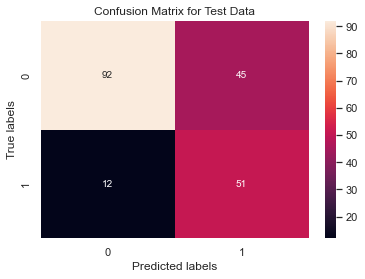

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as pt
import seaborn as sbn

con_mat = confusion_matrix(y_test, y_pred_binary)
ax= pt.subplot()
sbn.heatmap(con_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Data')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [40]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       137
           1       0.53      0.81      0.64        63

    accuracy                           0.71       200
   macro avg       0.71      0.74      0.70       200
weighted avg       0.77      0.71      0.73       200



In [41]:
import torch
#Save the state of the classification model
model_path  = "credit_risk_classifier.pth"
torch.save(model.state_dict(), model_path)

# Create an instance of the model
credit_risk_model = BinaryClassifier(X_train.shape[1])

# Load the model's parameters
credit_risk_model.load_state_dict(torch.load(model_path))
credit_risk_model.eval()  # Set the model to evaluation mode



BinaryClassifier(
  (layer1): Linear(in_features=80, out_features=256, bias=True)
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (layer5): Linear(in_features=256, out_features=1, bias=True)
)

In [42]:
#Method to convert input_df to onehot encoded form to be consumed by model

def mapMyData(input_df):
    names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']
    num_col = ["duration","creditamount", "installmentrate", "residencesince", "age","existingcredits","peopleliable"]
    encrypted_out_cols = X_hot.columns                          
    output_df = pd.DataFrame(columns=names)
    if (type(input_df) != pd.DataFrame):
        raise ValueError ("Hey, Cannot find dataframe object")
    elif (len(input_df.columns) <20 or len(input_df.columns) >20):
        raise ValueError ("Hey, The data entered is incorrect. Please check all columns properly")
    for col in input_df.columns:
        if col not in names:
            raise ValueError ("Hey, Unidentified Colums in the input Data. Please correct data.")
    num_map = {'duration': [ 4., 21., 38., 55., 72.],
                 'creditamount': [  250. ,  4793.5,  9337. , 13880.5, 18424. ],
                 'installmentrate': [1.  , 1.75, 2.5 , 3.25, 4.  ],
                 'residencesince': [1.  , 1.75, 2.5 , 3.25, 4.  ],
                 'age': [19., 33., 47., 61., 75.],
                 'existingcredits': [1.  , 1.75, 2.5 , 3.25, 4.  ],
                 'peopleliable': [1.  , 1.25, 1.5 , 1.75, 2.  ]}
    Label_map = {'existingchecking': {'A11': 0, 'A12': 1, 'A14': 3, 'A13': 2},
                 'duration': {},
                 'credithistory': {'A34': 4, 'A32': 2, 'A33': 3, 'A30': 0, 'A31': 1},
                 'purpose': {'A43': 4,
                  'A46': 7,
                  'A42': 3,
                  'A40': 0,
                  'A41': 1,
                  'A49': 9,
                  'A44': 5,
                  'A45': 6,
                  'A410': 2,
                  'A48': 8},
                 'creditamount': {},
                 'savings': {'A65': 4, 'A61': 0, 'A63': 2, 'A64': 3, 'A62': 1},
                 'employmentsince': {'A75': 4, 'A73': 2, 'A74': 3, 'A71': 0, 'A72': 1},
                 'installmentrate': {},
                 'statussex': {'A93': 2, 'A92': 1, 'A91': 0, 'A94': 3},
                 'otherdebtors': {'A101': 0, 'A103': 2, 'A102': 1},
                 'residencesince': {},
                 'property': {'A121': 0, 'A122': 1, 'A124': 3, 'A123': 2},
                 'age': {},
                 'otherinstallmentplans': {'A143': 2, 'A141': 0, 'A142': 1},
                 'housing': {'A152': 1, 'A153': 2, 'A151': 0},
                 'existingcredits': {},
                 'job': {'A173': 2, 'A172': 1, 'A174': 3, 'A171': 0},
                 'peopleliable': {},
                 'telephone': {'A192': 1, 'A191': 0},
                 'foreignworker': {'A201': 0, 'A202': 1},
                 'classification': {1: 0, 2: 1}}
    #Iterate over input DataFrame
    for col in input_df.columns:
        
            if col in num_col:
                output_array = []
                for value in input_df[col]:
                    val_arr = num_map[col]
                    ret_val = 0.0
                    for pos in range(len(val_arr)):
                        if (value > val_arr[pos] and pos>0):
                            ret_val = float(pos)
                    output_array.append(ret_val)
                    #print(col, value, ret_val)
                output_df[col] = output_array
                
            else:
                output_array = []
                for value in input_df[col]:
                    #print(col, value, Label_map[col][value])
                    output_array.append(Label_map[col][value])
                output_df[col] = output_array
    
    encrypted_df = output_df.apply(lambda x: x.apply(lambda y: encrypt_deterministic(key, y)))
    output_df_hot = pd.get_dummies(encrypted_df, columns=encrypted_df.columns)
    encrypted_out_hot = pd.DataFrame(0,columns=encrypted_out_cols, index = range(input_df.shape[0]))
    for col in encrypted_out_hot.columns:
        if col in output_df_hot.columns:
            encrypted_out_hot[col]=output_df_hot[col]
            #print("Hey", col)
    return encrypted_out_hot
    

In [43]:
from flask import Flask, request, jsonify
app = Flask(__name__)

@app.route('/predictCreditRisk', methods=['POST'])
def predict():
    try:
        print('Called predictCgenerated_dataeditRisk')
        # Get the input data from the request
        input_data = request.get_json(force=True)                 
        # Convert JSON data to DataFrame      
        df = pd.DataFrame(input_data)
        input_data_hot = mapMyData(df)       
        y_pred = credit_risk_model(torch.tensor(input_data_hot.values, dtype=torch.float)) 
        y_pred_binary = np.where(y_pred > 0.5  , 1, 2)
        print(y_pred_binary)
        return jsonify(y_pred_binary.tolist())        
    except Exception as e:
        print(e)
        return jsonify({'error': str(e)})

In [ ]:
if __name__ =='__main__':
    app.run(debug=False, port=8049, use_reloader=False)

In [ ]:
import torch
import torch.nn as nn

# Assuming you have predicted probabilities and true labels
predicted_probabilities = torch.tensor([0.2, 0.8, 0.6, 0.3], dtype=torch.float32)
true_labels = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

# Initialize BCELoss
criterion = nn.BCELoss()

# Calculate the loss
loss = criterion(predicted_probabilities, true_labels)

# Print the result
print("BCE Loss:", loss.item())

BCE Loss: 0.3284469246864319


In [5]:
with torch.no_grad():
    # Forward pass
    #outputs = model(predicted_probabilities)
    
    # Calculate loss
    loss = criterion(predicted_probabilities, true_labels)
    
    # Calculate accuracy
    _, predicted = torch.max(predicted_probabilities, 0)
    correct = (predicted == true_labels).sum().item()
    total = true_labels.size(0)
    accuracy = correct / total

In [7]:
predicted

tensor(1)